# **Tahap 1 – Mount Google Drive**

Pada tahap ini, Google Drive di-*mount* ke lingkungan Colab agar dataset OSSN yang disimpan di Drive dapat diakses sebagai file lokal.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Tahap 2 – Memuat Dataset OSSN**

Tahap ini memuat seluruh tabel mentah yang dibutuhkan dari sistem OSSN, yaitu:
- `ossn_users` (data pengguna)
- `ossn_relationships` (relasi pertemanan)
- `ossn_object` (postingan)
- `ossn_likes` (aktivitas like)
- `ossn_annotations` (komentar)

Seluruh file dibaca dari folder di Google Drive dan disimpan dalam bentuk DataFrame pandas.

In [2]:
import pandas as pd
import os

BASE_PATH = "/content/drive/MyDrive/DataOSSN"

users_df      = pd.read_csv(os.path.join(BASE_PATH, "ossn_users.csv"))
relations_df  = pd.read_csv(os.path.join(BASE_PATH, "ossn_relationships.csv"))
objects_df    = pd.read_csv(os.path.join(BASE_PATH, "ossn_object.csv"))
likes_df      = pd.read_csv(os.path.join(BASE_PATH, "ossn_likes.csv"))
ann_df        = pd.read_csv(os.path.join(BASE_PATH, "ossn_annotations.csv"))

users_df.head()


,guid,type,username,email,password,salt,first_name,last_name,last_login,last_activity,activation,time_created,time_updated
0,1,admin,INIADMIN,elgafirmantara27@gmail.com,$2y$10$rIV5mfes23jaX5Z.wP.54udwIFzCCqC/QL3BIum...,5256ee4a,System,Administrator,1764066456,1764067639,NaN,1763464485,1763558141
1,2,normal,Suryajayadi,suryajayadi34@gmail.com,$2y$10$vpGKan0qr3BI8p55uHydOOX4Q1btt4XvgpAD9Ed...,747d3f96,Surya,Jayadi34,1763562728,1763562742,NaN,1763465031,1763469037
2,3,normal,KhoirulFuad,khoirulfuad55@gmail.com,$2y$10$rFledCyCH91Q39oPpRVP..0QHNKgfThmfEcdTlD...,7e80c67d,Khoirul,Fuad,1763607848,1763608930,NaN,1763465192,1763468918
3,4,normal,ErikBakrie1,erikbakrie1@gmail.com,$2y$10$Ff5dcNHNQLrFchbO3OBFt.g.R3f8T5G0kP/is5H...,809cdb93,Erik,Bakrie1,1763474840,1763475197,NaN,1763465225,1763465225
4,5,normal,BahlilGo,anime45@gmail.com,$2y$10$Wwj70kKed/zHa63gWbeJZuQX8gN/hXomox0Uo9D...,832f0ace,Bahlil,Sugianto,1763561322,1763562314,NaN,1763465267,1763470493


In [6]:
import pandas as pd
import os

BASE_PATH = "/content/drive/MyDrive/DataOSSN"

users_df      = pd.read_csv(os.path.join(BASE_PATH, "ossn_users.csv"))
relations_df  = pd.read_csv(os.path.join(BASE_PATH, "ossn_relationships.csv"))
objects_df    = pd.read_csv(os.path.join(BASE_PATH, "ossn_object.csv"))
likes_df      = pd.read_csv(os.path.join(BASE_PATH, "ossn_likes.csv"))
ann_df        = pd.read_csv(os.path.join(BASE_PATH, "ossn_annotations.csv"))

# ============================
# 📌 Fungsi untuk cek dataset
# ============================
def check_dataset(df, name):
    print(f"\n==============================")
    print(f"🔍 CEK DATASET: {name}")
    print("==============================")

    # 1. Jumlah baris & kolom
    print(f"• Shape: {df.shape}")

    # 2. Missing value per kolom
    print("\n• Missing values per column:")
    print(df.isna().sum())

    # 3. Total missing value
    print("\n• Total missing:", df.isna().sum().sum())

    # 4. Cek duplikasi seluruh baris
    n_duplicates = df.duplicated().sum()
    print(f"\n• Total duplicated rows: {n_duplicates}")

    if n_duplicates > 0:
        print("  → Gunakan df.drop_duplicates() jika ingin membersihkan.")
    else:
        print("  → Tidak ada duplikasi.")

    print("\n")

# ============================
# 🔍 CEK SEMUA DATASET
# ============================
check_dataset(users_df, "ossn_users")
check_dataset(relations_df, "ossn_relationships")
check_dataset(objects_df, "ossn_object")
check_dataset(likes_df, "ossn_likes")
check_dataset(ann_df, "ossn_annotations")



🔍 CEK DATASET: ossn_users
• Shape: (331, 13)

• Missing values per column:
guid               0
type               0
username           0
email              0
password           0
salt             300
first_name         0
last_name          0
last_login         0
last_activity      0
activation       331
time_created       0
time_updated       0
dtype: int64

• Total missing: 631

• Total duplicated rows: 0
  → Tidak ada duplikasi.



🔍 CEK DATASET: ossn_relationships
• Shape: (1107, 5)

• Missing values per column:
relation_id      0
relation_from    0
relation_to      0
type             0
time             0
dtype: int64

• Total missing: 0

• Total duplicated rows: 0
  → Tidak ada duplikasi.



🔍 CEK DATASET: ossn_object
• Shape: (1206, 8)

• Missing values per column:
guid              0
owner_guid        0
type              0
time_created      0
time_updated      0
title           305
description      19
subtype           0
dtype: int64

• Total missing: 324

• Total duplicated ro

# **Tahap 3 – Menyiapkan Data Dasar Pengguna**

Pada tahap ini, data pengguna difilter untuk menghapus akun bertipe *admin* dan disusun DataFrame dasar `user_features` yang berisi ID dan username sebagai identitas utama setiap user.

In [ ]:
# Buang user dengan type = 'admin'
users_non_admin = users_df[users_df["type"] != "admin"].copy()

# Ambil kolom dasar: id, username
user_features = users_non_admin[["guid", "username"]].copy()
user_features.rename(columns={"guid": "user_id"}, inplace=True)

user_features.head()


,user_id,username
1,2,Suryajayadi
2,3,KhoirulFuad
3,4,ErikBakrie1
4,5,BahlilGo
5,6,Maulanaaa


# **Tahap 4 – Menghitung Fitur Aktivitas (Post, Like, Komentar)**

Tahap ini membangun berbagai fitur aktivitas per pengguna, meliputi:
- jumlah postingan yang dibuat,
- jumlah like yang diberikan,
- jumlah like yang diterima oleh postingan milik user,
- jumlah komentar yang diberikan,
- jumlah komentar yang diterima pada postingan milik user.
Fitur-fitur ini akan menjadi dasar untuk proses clustering.

In [ ]:
# Hitung jumlah post (owner_guid = user pemilik post)
posts_per_user = (
    objects_df
    .groupby("owner_guid")
    .size()
    .reset_index(name="jumlah_postingan")
    .rename(columns={"owner_guid": "user_id"})
)


# 1) LIKE DIBERIKAN: berapa kali user memberi like
like_diberikan = (
    likes_df
    .groupby("subject_id")
    .size()
    .reset_index(name="like_diberikan")
    .rename(columns={"subject_id": "user_id"})
)

# 2) LIKE DITERIMA: berapa kali postingan user di-like
# Join likes -> objects untuk tahu pemilik posting yang di-like
likes_with_owner = likes_df.merge(
    objects_df[["guid", "owner_guid"]],
    left_on="subject_id",
    right_on="guid",
    how="inner"
)

like_diterima = (
    likes_with_owner
    .groupby("owner_guid")
    .size()
    .reset_index(name="like_diterima")
    .rename(columns={"owner_guid": "user_id"})
)

# 1) KOMEN DIBERIKAN: berapa komentar yang user tulis
komen_diberikan = (
    ann_df
    .groupby("owner_guid")
    .size()
    .reset_index(name="komen_diberikan")
    .rename(columns={"owner_guid": "user_id"})
)

# 2) KOMEN DITERIMA: komentar yang masuk ke postingan user
# Asumsi: ann_df.subject_guid = id post (guid di objects_df)

# Siapkan objek dengan nama kolom owner_guid yang beda
objects_for_merge = objects_df[["guid", "owner_guid"]].rename(
    columns={"owner_guid": "post_owner_id"}
)

ann_with_owner = ann_df.merge(
    objects_for_merge,
    left_on="subject_guid",   # id post di annotations
    right_on="guid",          # id post di objects
    how="inner"
)

# Sekarang kolom pemilik post = post_owner_id
komen_diterima = (
    ann_with_owner
    .groupby("post_owner_id")
    .size()
    .reset_index(name="komen_diterima")
    .rename(columns={"post_owner_id": "user_id"})
)

# **Tahap 5 – Menghitung Jumlah Teman per Pengguna**

Selain aktivitas posting, like, dan komentar, fitur `jumlah_teman` dihitung dari tabel relasi pertemanan. Fitur ini digunakan untuk melihat sejauh mana koneksi sosial setiap user di dalam jaringan.

In [ ]:
# Filter hanya relasi bertipe friend:...
relations_filtered = relations_df[relations_df["type"].str.startswith("friend:", na=False)].copy()

# Dua sisi hubungan: from dan to dianggap teman
rel_from = relations_filtered[["relation_from", "relation_to"]].rename(
    columns={"relation_from": "user_id", "relation_to": "friend_id"}
)
rel_to = relations_filtered[["relation_to", "relation_from"]].rename(
    columns={"relation_to": "user_id", "relation_from": "friend_id"}
)

# Gabungkan dua sisi dan buang duplikat
all_rel = pd.concat([rel_from, rel_to], ignore_index=True).drop_duplicates()

# Hitung jumlah teman unik per user
jumlah_teman = (
    all_rel
    .groupby("user_id")["friend_id"]
    .nunique()
    .reset_index(name="jumlah_teman")
)

jumlah_teman.head()


,user_id,jumlah_teman
0,2,5
1,3,5
2,4,1
3,5,6
4,6,4


# **Tahap 6 – Menggabungkan Seluruh Fitur ke Dataframe `user_features`**

Pada tahap ini, seluruh fitur hasil perhitungan (postingan, like, komentar, jumlah teman) digabungkan ke dalam satu DataFrame `user_features`. Nilai kosong diisi dengan nol sehingga setiap user memiliki nilai numerik lengkap untuk semua fitur.

In [ ]:
# Gabungkan semua fitur aktivitas ke user_features
for df_feat in [
    posts_per_user,
    like_diberikan,
    like_diterima,
    komen_diberikan,
    komen_diterima,
    jumlah_teman,   # pastikan sudah didefinisikan
]:
    user_features = user_features.merge(df_feat, on="user_id", how="left")

# Isi NaN dengan 0 untuk kolom hitungan
count_cols = [
    "jumlah_postingan",
    "like_diberikan",
    "like_diterima",
    "komen_diberikan",
    "komen_diterima",
    "jumlah_teman",
]

for col in count_cols:
    if col in user_features.columns:
        user_features[col] = user_features[col].fillna(0).astype(int)

user_features.head()

,user_id,username,jumlah_postingan,like_diberikan,like_diterima,komen_diberikan,komen_diterima,jumlah_teman
0,2,Suryajayadi,11,1,1383,11,3,5
1,3,KhoirulFuad,12,0,10,4,8,5
2,4,ErikBakrie1,10,0,1076,1,3,1
3,5,BahlilGo,12,0,1455,11,1,6
4,6,Maulanaaa,17,0,3593,1,2,4


# **Tahap 7 – Validasi Kualitas Data Fitur**

Sebelum fitur digunakan untuk pemodelan, dilakukan pengecekan terhadap:
- nilai kosong (*missing values*),
- duplikasi baris,
- duplikasi `user_id`.

Hal ini untuk memastikan bahwa setiap user hanya muncul satu kali dan seluruh fitur terisi dengan benar.

In [ ]:
# Cek missing values per kolom
na_counts = user_features.isna().sum()

# Cek duplikasi baris dan duplikasi user_id
dup_rows = user_features.duplicated().sum()
dup_user_id = user_features["user_id"].duplicated().sum()

print("=== Missing values per kolom ===")
print(na_counts)

print("\n=== Duplikasi ===")
print(f"Duplikat baris keseluruhan : {dup_rows}")
print(f"Duplikat berdasarkan user_id: {dup_user_id}")

=== Missing values per kolom ===
user_id             0
username            0
jumlah_postingan    0
like_diberikan      0
like_diterima       0
komen_diberikan     0
komen_diterima      0
jumlah_teman        0
dtype: int64

=== Duplikasi ===
Duplikat baris keseluruhan : 0
Duplikat berdasarkan user_id: 0


# **Tahap 8 – Menyimpan Tabel Fitur Final**

Setelah data fitur diverifikasi, tabel `user_features` disimpan ke dalam file CSV untuk memudahkan pemakaian ulang pada tahap pemodelan (misalnya clustering K-Means dan K-Medoids).

In [ ]:
output_path = os.path.join(BASE_PATH, "user_features_final_pandas.csv")
user_features.to_csv(output_path, index=False)

print("Tabel fitur final (non-admin) disimpan di:")
print(output_path)

Tabel fitur final (non-admin) disimpan di:
/content/drive/MyDrive/ML Habiel - Database OSSN/user_features_final_pandas.csv


# **Tahap 9 – Deteksi Outlier pada Fitur Numerik**

Pada tahap ini dilakukan deteksi outlier untuk setiap fitur numerik menggunakan metode IQR (Interquartile Range).
Untuk setiap kolom dihitung:
- Q1 (kuartil bawah),
- Q3 (kuartil atas),
- IQR = Q3 − Q1,
- batas bawah (Q1 − 1.5 × IQR),
- batas atas (Q3 + 1.5 × IQR),
- jumlah nilai yang berada di luar batas tersebut.

Ringkasan ini membantu memahami seberapa banyak nilai ekstrem (outlier) pada setiap fitur aktivitas pengguna.

In [ ]:
import numpy as np  # hapus baris ini jika sudah import numpy sebelumnya

numeric_cols = user_features.select_dtypes(include=["int64", "float64"]).columns

outlier_summary = {}

for col in numeric_cols:
    q1 = user_features[col].quantile(0.25)
    q3 = user_features[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    mask = (user_features[col] < lower) | (user_features[col] > upper)

    outlier_summary[col] = {
        "q1": q1,
        "q3": q3,
        "iqr": iqr,
        "lower": lower,
        "upper": upper,
        "n_outliers": int(mask.sum()),
    }

outlier_summary_df = pd.DataFrame(outlier_summary).T
outlier_summary_df

,q1,q3,iqr,lower,upper,n_outliers
user_id,90.25,254.75,164.5,-156.5,501.5,0.0
jumlah_postingan,2.00,5.00,3.0,-2.5,9.5,16.0
like_diberikan,129.00,299.00,170.0,-126.0,554.0,0.0
like_diterima,0.00,0.00,0.0,0.0,0.0,41.0
komen_diberikan,129.00,226.00,97.0,-16.5,371.5,0.0
komen_diterima,60.00,299.00,239.0,-298.5,657.5,0.0
jumlah_teman,6.00,6.00,0.0,6.0,6.0,49.0


# **Tahap 10 – Menyiapkan Fitur untuk Clustering (K-Means)**

Pada tahap ini dipilih fitur-fitur numerik yang akan digunakan sebagai input clustering, kemudian dilakukan proses scaling menggunakan `StandardScaler` agar setiap fitur berada pada skala yang sebanding.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Fitur numerik yang digunakan untuk clustering
feature_cols = [
    "jumlah_postingan",
    "like_diberikan",
    "like_diterima",
    "komen_diberikan",
    "komen_diterima",
    "jumlah_teman",
]

# Ambil subset fitur
X = user_features[feature_cols].copy()

# Isi NaN (kalau masih ada) dengan median kolom
X = X.fillna(X.median(numeric_only=True))

# Scaling fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Tahap 11 – Menentukan Jumlah Cluster dengan Elbow dan Silhouette (K-Means)**

Pada tahap ini dilakukan evaluasi K-Means untuk beberapa nilai k (2–10) menggunakan:
- Inertia (SSE) untuk Elbow Method,
- Silhouette Score untuk mengukur kualitas pemisahan cluster.

Hasil ini digunakan untuk menentukan jumlah cluster optimal.

k = 2, inertia = 1146.42, silhouette = 0.6496
k = 3, inertia = 815.75, silhouette = 0.3976
k = 4, inertia = 648.86, silhouette = 0.4015
k = 5, inertia = 517.04, silhouette = 0.4236
k = 6, inertia = 414.19, silhouette = 0.4247
k = 7, inertia = 363.48, silhouette = 0.3983
k = 8, inertia = 312.23, silhouette = 0.3864
k = 9, inertia = 273.00, silhouette = 0.3791
k = 10, inertia = 254.49, silhouette = 0.3784


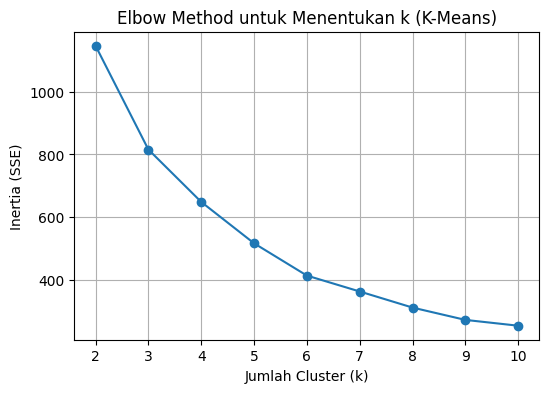

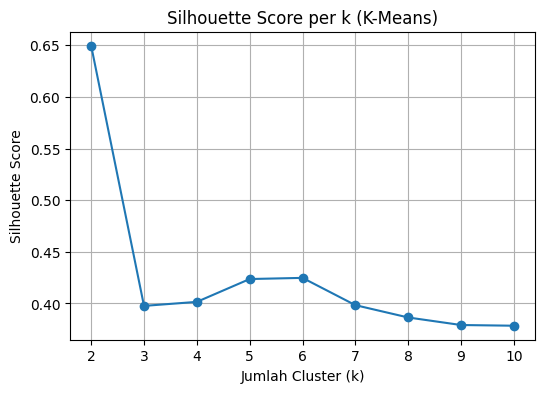

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values = range(2, 11)
inertias = []
sil_scores = []

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10,
    )
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

    print(f"k = {k}, inertia = {kmeans.inertia_:.2f}, silhouette = {sil:.4f}")

# Plot Elbow (inertia)
plt.figure(figsize=(6, 4))
plt.plot(k_values, inertias, marker="o")
plt.xticks(k_values)
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method untuk Menentukan k (K-Means)")
plt.grid(True)
plt.show()

# (Opsional) kalau mau sekalian plot Silhouette:
plt.figure(figsize=(6, 4))
plt.plot(k_values, sil_scores, marker="o")
plt.xticks(k_values)
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score per k (K-Means)")
plt.grid(True)
plt.show()

# **Tahap 12 – Training Model K-Means Final (k = 4)**

Berdasarkan hasil evaluasi, dipilih k = 4 sebagai jumlah cluster optimal.
Pada tahap ini, model K-Means dengan k = 4 dilatih, label cluster disimpan ke `user_features`, dan dilakukan ringkasan karakteristik setiap cluster.

In [ ]:
k_final = 4

kmeans_final = KMeans(
    n_clusters=k_final,
    random_state=42,
    n_init=10,
)

# Fit ke data yang sudah di-scale
labels_k4 = kmeans_final.fit_predict(X_scaled)

# Simpan label cluster ke dataframe
user_features["cluster_k4"] = labels_k4

# Jumlah anggota tiap cluster
print("Jumlah user per cluster (k=4):")
print(user_features["cluster_k4"].value_counts().sort_index())

# Ringkasan rata-rata fitur per cluster
cluster_summary_k4 = user_features.groupby("cluster_k4")[feature_cols].mean()
print("\nRingkasan rata-rata fitur per cluster (k=4):")
print(cluster_summary_k4)

# Simpan hasil ke CSV
out_path_k4 = os.path.join(BASE_PATH, "user_features_kmeans_k4.csv")
user_features.to_csv(out_path_k4, index=False)
print("\nHasil K-Means (k=4) disimpan di:")
print(out_path_k4)

Jumlah user per cluster (k=4):
cluster_k4
0    166
1     22
2    135
3      7
Name: count, dtype: int64

Ringkasan rata-rata fitur per cluster (k=4):
            jumlah_postingan  like_diberikan  like_diterima  komen_diberikan  \
cluster_k4                                                                     
0                   1.921687      219.728916      12.391566       239.542169   
1                   7.136364        1.090909    1273.545455         2.500000   
2                   4.392593      221.703704      50.066667       142.807407   
3                  19.571429        0.857143    4162.571429         9.571429   

            komen_diterima  jumlah_teman  
cluster_k4                                
0               118.373494      5.915663  
1                 3.318182      1.727273  
2               291.688889      5.925926  
3                 9.142857      4.000000  

Hasil K-Means (k=4) disimpan di:
/content/drive/MyDrive/ML Habiel - Database OSSN/user_features_kmeans_k4.csv


# **Tahap 13 – Visualisasi Cluster K-Means (k = 4) di Ruang PCA 2D**

Pada tahap ini, dilakukan reduksi dimensi menggunakan PCA (Principal Component Analysis) dari ruang fitur berdimensi 6 menjadi 2 dimensi. Proyeksi PCA ini digunakan untuk memvisualisasikan sebaran cluster K-Means (k = 4) sehingga pola pemisahan cluster dapat terlihat secara intuitif.

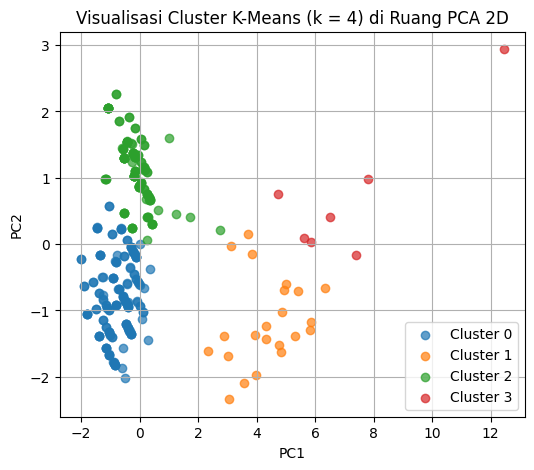

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np  # bisa dihapus jika sudah di-import sebelumnya

# Proyeksi data hasil scaling ke 2 dimensi dengan PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Ambil label cluster K-Means
labels = user_features["cluster_k4"].values

plt.figure(figsize=(6, 5))

for cl in sorted(np.unique(labels)):
    mask = labels == cl
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        label=f"Cluster {cl}",
        alpha=0.7,
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualisasi Cluster K-Means (k = 4) di Ruang PCA 2D")
plt.legend()
plt.grid(True)
plt.show()

# **Tahap 14 – Instalasi `scikit-learn-extra` (untuk K-Medoids)**

Algoritma K-Medoids tidak tersedia di scikit-learn standar, sehingga diperlukan library tambahan `scikit-learn-extra`. Cell berikut hanya perlu dijalankan satu kali di awal (atau ketika environment baru).

In [ ]:
!pip install -q scikit-learn-extra==0.3.0

# **Tahap 15 – Evaluasi Jumlah Cluster dengan K-Medoids (Elbow & Silhouette)**

Sebagai pembanding terhadap K-Means, algoritma K-Medoids digunakan untuk mengevaluasi struktur cluster. Pada tahap ini dihitung:
- nilai inertia (total jarak ke medoid) untuk Elbow Method, dan
- Silhouette Score untuk menilai kualitas pemisahan cluster

untuk k = 2 sampai k = 10.

k = 2, inertia = 580.61, silhouette (K-Medoids) = 0.1434
k = 3, inertia = 571.63, silhouette (K-Medoids) = 0.0015
k = 4, inertia = 439.04, silhouette (K-Medoids) = 0.3372
k = 5, inertia = 418.71, silhouette (K-Medoids) = 0.2474
k = 6, inertia = 408.28, silhouette (K-Medoids) = 0.1789
k = 7, inertia = 395.00, silhouette (K-Medoids) = 0.1929
k = 8, inertia = 357.78, silhouette (K-Medoids) = 0.2284
k = 9, inertia = 351.40, silhouette (K-Medoids) = 0.2756
k = 10, inertia = 349.61, silhouette (K-Medoids) = 0.2553

=== K-Medoids Elbow ===


/usr/local/lib/python3.12/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 3 

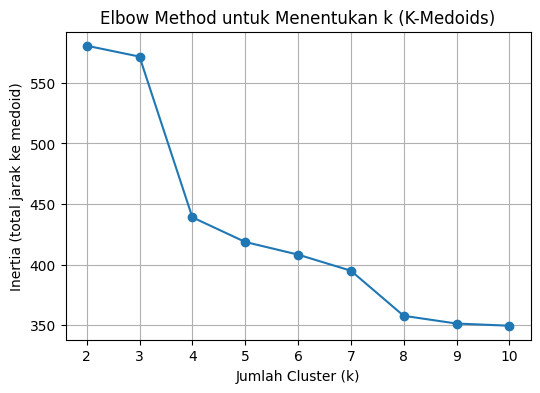

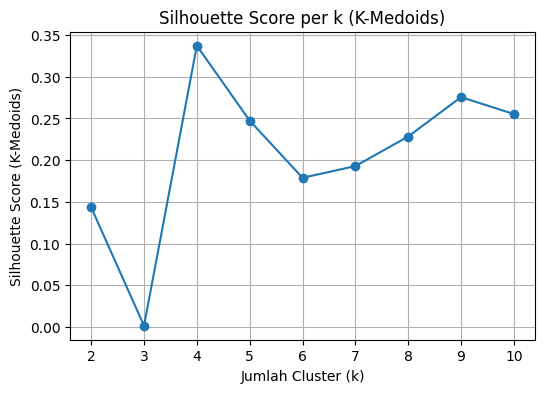

In [ ]:
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

k_values = range(2, 11)
inertias_kmed = []
sil_scores_kmed = []

for k in k_values:
    kmedoids = KMedoids(
        n_clusters=k,
        metric="euclidean",
        random_state=42,
    )
    labels = kmedoids.fit_predict(X_scaled)
    inertia = kmedoids.inertia_
    inertias_kmed.append(inertia)

    # Silhouette bisa dihitung selama tidak ada cluster kosong
    sil = silhouette_score(X_scaled, labels)
    sil_scores_kmed.append(sil)

    print(f"k = {k}, inertia = {inertia:.2f}, silhouette (K-Medoids) = {sil:.4f}")

print("\n=== K-Medoids Elbow ===")

# Plot Elbow K-Medoids (inertia)
plt.figure(figsize=(6, 4))
plt.plot(k_values, inertias_kmed, marker="o")
plt.xticks(k_values)
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia (total jarak ke medoid)")
plt.title("Elbow Method untuk Menentukan k (K-Medoids)")
plt.grid(True)
plt.show()

# (Opsional) plot Silhouette Score K-Medoids
plt.figure(figsize=(6, 4))
plt.plot(k_values, sil_scores_kmed, marker="o")
plt.xticks(k_values)
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score (K-Medoids)")
plt.title("Silhouette Score per k (K-Medoids)")
plt.grid(True)
plt.show()

# **Tahap 16 – Training K-Medoids dengan k = 4 (Sebagai Model Pembanding)**

Berdasarkan hasil evaluasi sebelumnya, k = 4 juga diuji menggunakan K-Medoids. Pada tahap ini dilakukan:
- pelatihan model K-Medoids k = 4,
- perhitungan Silhouette Score,
- ringkasan jumlah anggota dan rata-rata fitur per cluster,
- penyimpanan hasil ke file CSV untuk keperluan analisis lebih lanjut.

In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import os

k_med = 4

kmedoids = KMedoids(
    n_clusters=k_med,
    metric="euclidean",
    random_state=42,
)

labels_kmed4 = kmedoids.fit_predict(X_scaled)

# Simpan label K-Medoids ke dataframe
user_features["cluster_kmed4"] = labels_kmed4

# Silhouette untuk K-Medoids k=4
sil_kmed4 = silhouette_score(X_scaled, labels_kmed4)
print(f"Silhouette K-Medoids (k=4): {sil_kmed4:.4f}")

# Jumlah user per cluster
print("\nJumlah user per cluster (K-Medoids, k=4):")
print(user_features["cluster_kmed4"].value_counts().sort_index())

# Ringkasan rata-rata fitur per cluster
cluster_summary_kmed4 = user_features.groupby("cluster_kmed4")[feature_cols].mean()
print("\nRingkasan rata-rata fitur per cluster (K-Medoids, k=4):")
print(cluster_summary_kmed4)

# Simpan hasil ke CSV
out_path_kmed4 = os.path.join(BASE_PATH, "user_features_kmedoids_k4.csv")
user_features.to_csv(out_path_kmed4, index=False)
print("\nHasil K-Medoids (k=4) disimpan di:")
print(out_path_kmed4)

Silhouette K-Medoids (k=4): 0.3372

Jumlah user per cluster (K-Medoids, k=4):
cluster_kmed4
0     66
1     43
2    106
3    115
Name: count, dtype: int64

Ringkasan rata-rata fitur per cluster (K-Medoids, k=4):
               jumlah_postingan  like_diberikan  like_diterima  \
cluster_kmed4                                                    
0                      5.939394       83.545455     758.878788   
1                      3.023256      450.069767      22.651163   
2                      4.650943      181.641509     130.462264   
3                      1.660870      194.034783       9.417391   

               komen_diberikan  komen_diterima  jumlah_teman  
cluster_kmed4                                                 
0                    96.333333       83.818182      4.393939  
1                   195.372093      215.581395      5.906977  
2                   143.311321      298.113208      5.886792  
3                   254.043478      110.982609      5.913043  

Hasil K-Medoi

/usr/local/lib/python3.12/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(


# **Tahap 18 – Visualisasi Cluster K-Medoids (k = 4) di Ruang PCA 2D**

Visualisasi ini menggunakan proyeksi PCA yang sama dengan K-Means, sehingga perbandingan bentuk cluster antara K-Means dan K-Medoids dapat dilakukan pada ruang 2 dimensi yang konsisten.

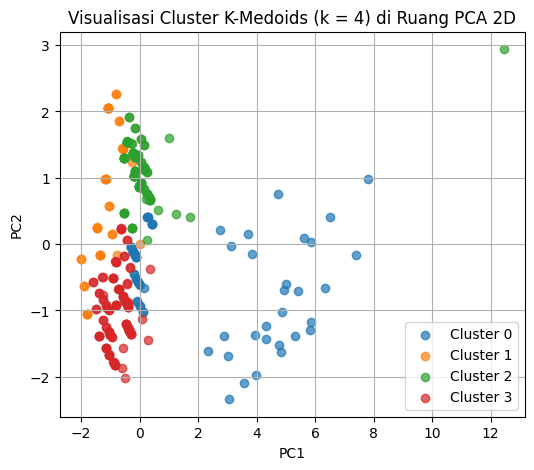

In [ ]:
# Pastikan X_pca sudah dihitung sebelumnya dengan PCA(n_components=2)
labels_kmed = user_features["cluster_kmed4"].values

plt.figure(figsize=(6, 5))
for cl in sorted(np.unique(labels_kmed)):
    mask = labels_kmed == cl
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        alpha=0.7,
        label=f"Cluster {cl}",
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualisasi Cluster K-Medoids (k = 4) di Ruang PCA 2D")
plt.legend()
plt.grid(True)
plt.show()

# **Tahap 19 – Perbandingan Kualitas Model K-Means dan K-Medoids (k = 4)**

Untuk menentukan model mana yang digunakan sebagai model final, K-Means dan K-Medoids dibandingkan pada k=4 menggunakan beberapa metrik:
- Silhouette Score (semakin besar semakin baik),
- Davies–Bouldin Index (semakin kecil semakin baik),
- Calinski–Harabasz Score (semakin besar semakin baik),
- waktu komputasi,
serta pengecekan apakah ada cluster kosong.

In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
)
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

k_candidates = [4]
results = []

# Evaluasi K-Means
for k in k_candidates:
    start = time.time()
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10,
    )
    labels = kmeans.fit_predict(X_scaled)
    elapsed = time.time() - start

    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    ch = calinski_harabasz_score(X_scaled, labels)
    inertia = kmeans.inertia_

    results.append({
        "algo": "kmeans",
        "k": k,
        "silhouette": sil,
        "davies_bouldin": db,
        "calinski_harabasz": ch,
        "inertia": inertia,
        "time_sec": elapsed,
        "empty_cluster": False,
    })

# Evaluasi K-Medoids
for k in k_candidates:
    start = time.time()
    kmed = KMedoids(
        n_clusters=k,
        metric="euclidean",
        random_state=42,
    )
    labels = kmed.fit_predict(X_scaled)
    elapsed = time.time() - start

    counts = np.bincount(labels, minlength=k)
    has_empty = (counts == 0).any()

    if has_empty:
        sil = np.nan
        db = np.nan
        ch = np.nan
    else:
        sil = silhouette_score(X_scaled, labels)
        db = davies_bouldin_score(X_scaled, labels)
        ch = calinski_harabasz_score(X_scaled, labels)

    inertia = getattr(kmed, "inertia_", np.nan)

    results.append({
        "algo": "kmedoids",
        "k": k,
        "silhouette": sil,
        "davies_bouldin": db,
        "calinski_harabasz": ch,
        "inertia": inertia,
        "time_sec": elapsed,
        "empty_cluster": has_empty,
    })

results_df = pd.DataFrame(results)

print("=== HASIL TUNING MENTAH (K-Means & K-Medoids) ===")
print(results_df.sort_values(["algo", "k"]))

# Filter kandidat valid (tidak ada cluster kosong & silhouette bukan NaN)
valid_results = results_df[
    (~results_df["empty_cluster"]) &
    (~results_df["silhouette"].isna())
].copy()

print("\n=== KANDIDAT VALID ===")
print(valid_results.sort_values(["silhouette"], ascending=False))

# Pilih model terbaik: silhouette tertinggi, lalu DB terkecil
best = (
    valid_results
    .sort_values(
        ["silhouette", "davies_bouldin"],
        ascending=[False, True],
    )
    .iloc[0]
)

best_algo = best["algo"]
best_k = int(best["k"])

print("\n=== MODEL TERPILIH ===")
print(f"Algoritma         : {best_algo}")
print(f"Jumlah cluster    : {best_k}")
print(f"Silhouette        : {best['silhouette']:.4f}")
print(f"Davies-Bouldin    : {best['davies_bouldin']:.4f}")
print(f"Calinski-Harabasz : {best['calinski_harabasz']:.2f}")
print(f"Inertia           : {best['inertia']:.2f}")
print(f"Waktu komputasi   : {best['time_sec']:.4f} detik")

=== HASIL TUNING MENTAH (K-Means & K-Medoids) ===
       algo  k  silhouette  davies_bouldin  calinski_harabasz     inertia  \
0    kmeans  4    0.401493        0.962623         222.929242  648.862047   
1  kmedoids  4    0.337245        1.307528          82.951618  439.042412   

   time_sec  empty_cluster  
0  0.026391          False  
1  0.010544          False  

=== KANDIDAT VALID ===
       algo  k  silhouette  davies_bouldin  calinski_harabasz     inertia  \
0    kmeans  4    0.401493        0.962623         222.929242  648.862047   
1  kmedoids  4    0.337245        1.307528          82.951618  439.042412   

   time_sec  empty_cluster  
0  0.026391          False  
1  0.010544          False  

=== MODEL TERPILIH ===
Algoritma         : kmeans
Jumlah cluster    : 4
Silhouette        : 0.4015
Davies-Bouldin    : 0.9626
Calinski-Harabasz : 222.93
Inertia           : 648.86
Waktu komputasi   : 0.0264 detik


/usr/local/lib/python3.12/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(


# **Tahap 20 – Training Model Final Berdasarkan Model Terpilih**

Model terbaik berdasarkan evaluasi (antara K-Means dan K-Medoids) kemudian dilatih kembali sebagai model final. Label cluster akhir disimpan dalam kolom `cluster_final`, dan dilakukan ringkasan karakteristik rata-rata tiap cluster.

In [ ]:
# Training model final sesuai hasil seleksi
if best_algo == "kmeans":
    final_model = KMeans(
        n_clusters=best_k,
        random_state=42,
        n_init=10,
    )
else:
    final_model = KMedoids(
        n_clusters=best_k,
        metric="euclidean",
        random_state=42,
    )

final_labels = final_model.fit_predict(X_scaled)
user_features["cluster_final"] = final_labels

print("Model final:", final_model)

print("\nJumlah user per cluster (model final):")
print(user_features["cluster_final"].value_counts().sort_index())

cluster_summary_final = user_features.groupby("cluster_final")[feature_cols].mean()
print("\nRingkasan rata-rata fitur per cluster (model final):")
print(cluster_summary_final)

# Simpan hasil
out_path_final = os.path.join(BASE_PATH, "user_features_cluster_final.csv")
user_features.to_csv(out_path_final, index=False)
print("\nData dengan cluster_final disimpan di:")
print(out_path_final)

Model final: KMeans(n_clusters=4, n_init=10, random_state=42)

Jumlah user per cluster (model final):
cluster_final
0    166
1     22
2    135
3      7
Name: count, dtype: int64

Ringkasan rata-rata fitur per cluster (model final):
               jumlah_postingan  like_diberikan  like_diterima  \
cluster_final                                                    
0                      1.921687      219.728916      12.391566   
1                      7.136364        1.090909    1273.545455   
2                      4.392593      221.703704      50.066667   
3                     19.571429        0.857143    4162.571429   

               komen_diberikan  komen_diterima  jumlah_teman  
cluster_final                                                 
0                   239.542169      118.373494      5.915663  
1                     2.500000        3.318182      1.727273  
2                   142.807407      291.688889      5.925926  
3                     9.571429        9.142857      4.00

# **Tahap 21 – Penamaan Kategori Cluster**

Agar hasil clustering lebih mudah dipahami, setiap nilai `cluster_final` diberi nama kategori yang merepresentasikan karakteristik perilaku pengguna. Hasilnya disimpan dalam kolom baru `cluster_final_name`.

In [ ]:
# Mapping nama kategori berdasarkan cluster_final
cluster_names = {
    0: "Pengguna Aktif Interaksi",
    1: "Kreator Populer Pasif",
    2: "Pengguna Aktif Seimbang",
    3: "Kreator Super Populer",
}

# Tambahkan kolom nama cluster
user_features["cluster_final_name"] = user_features["cluster_final"].map(cluster_names)

# Cek sampel hasil
print(user_features[["user_id", "cluster_final", "cluster_final_name"]].head())

print("\nJumlah user per kategori:")
print(user_features["cluster_final_name"].value_counts())

output_named = os.path.join(BASE_PATH, "user_features_cluster_final_named.csv")
user_features.to_csv(output_named, index=False)
print("\nDataset dengan nama kategori disimpan di:")
print(output_named)

   user_id  cluster_final     cluster_final_name
0        2              1  Kreator Populer Pasif
1        3              1  Kreator Populer Pasif
2        4              1  Kreator Populer Pasif
3        5              1  Kreator Populer Pasif
4        6              3  Kreator Super Populer

Jumlah user per kategori:
cluster_final_name
Pengguna Aktif Interaksi    166
Pengguna Aktif Seimbang     135
Kreator Populer Pasif        22
Kreator Super Populer         7
Name: count, dtype: int64

Dataset dengan nama kategori disimpan di:
/content/drive/MyDrive/ML Habiel - Database OSSN/user_features_cluster_final_named.csv


**Tahap 22 – Implementasi Rekomendasi Teman Berbasis Cluster**

Pada tahap ini dibuat fungsi rekomendasi teman berdasarkan hasil segmentasi pengguna (cluster_final). Setiap cluster diberi aturan distribusi rekomendasi, yaitu berapa banyak calon teman yang diambil dari masing-masing cluster lain. Fungsi kemudian memilih kandidat pengguna dari cluster yang sesuai, melakukan sampling acak, dan mengembalikan daftar rekomendasi maksimal sejumlah nilai yang ditentukan (default 10). Hasil ini memungkinkan sistem memberikan rekomendasi teman yang lebih relevan dan sesuai pola aktivitas pengguna.

In [ ]:
import pandas as pd  # biasanya sudah di-import di atas, jadi tidak wajib diulang

# Maksimal rekomendasi per user
MAX_RECS = 10

# Mapping rekomendasi teman per cluster user
# key   : cluster user saat ini
# value : {cluster_target: jumlah rekomendasi dari cluster tersebut}
friend_distribution = {
    0: {  # Interaktor Sosial Aktif
        0: 5,
        2: 3,
        1: 2,
    },
    2: {  # Pengguna Aktif Seimbang
        2: 4,
        0: 3,
        1: 3,
    },
    1: {  # Kreator Populer
        1: 5,
        2: 3,
        3: 2,
    },
    3: {  # Kreator Super Populer
        3: 4,
        2: 4,
        1: 2,
    },
}


def recommend_friends_by_cluster(
    user_id: int,
    df_user: pd.DataFrame,
    max_total: int = MAX_RECS,
    distribution_map: dict = friend_distribution,
    random_state: int | None = None,
):
    """
    Rekomendasi teman berdasarkan cluster.
    Mengembalikan: (cluster_user, nama_cluster, DataFrame rekomendasi)
    """
    row = df_user[df_user["user_id"] == user_id]
    if row.empty:
        raise ValueError(f"user_id {user_id} tidak ditemukan di df_user.")

    row = row.iloc[0]
    current_cluster = int(row["cluster_final"])
    current_name = (
        row["cluster_final_name"]
        if "cluster_final_name" in df_user.columns
        else f"Cluster {current_cluster}"
    )

    # Jika cluster tidak ada di distribution_map, fallback: semua dari cluster yang sama
    dist = distribution_map.get(current_cluster, {current_cluster: max_total})

    rec_rows = []
    total_added = 0

    for target_cluster, target_n in dist.items():
        if total_added >= max_total:
            break

        remaining_slots = max_total - total_added
        if remaining_slots <= 0:
            break

        n_to_take = min(target_n, remaining_slots)

        # Kandidat: sama cluster target, bukan dirinya sendiri
        candidates = df_user[
            (df_user["cluster_final"] == target_cluster)
            & (df_user["user_id"] != user_id)
        ]

        if candidates.empty:
            continue

        if len(candidates) <= n_to_take:
            sampled = candidates
        else:
            sampled = candidates.sample(n=n_to_take, random_state=random_state)

        rec_rows.append(sampled)
        total_added += len(sampled)

    if not rec_rows:
        # Tidak ada rekomendasi sama sekali
        return current_cluster, current_name, df_user.iloc[0:0]

    rec_df = (
        pd.concat(rec_rows, axis=0)
        .drop_duplicates(subset=["user_id"])
        .head(max_total)
    )

    return current_cluster, current_name, rec_df


# Contoh penggunaan
contoh_user_id = user_features["user_id"].iloc[0]

current_cluster, current_name, rec_df = recommend_friends_by_cluster(
    user_id=contoh_user_id,
    df_user=user_features,
    max_total=10,
    distribution_map=friend_distribution,
    random_state=42,
)

print(f"User {contoh_user_id} berada di cluster {current_cluster} - {current_name}")
print("Rekomendasi teman (maks 10):")
cols_show = ["user_id", "username", "cluster_final", "cluster_final_name"]
cols_show = [c for c in cols_show if c in rec_df.columns]
print(rec_df[cols_show])

User 2 berada di cluster 1 - Kreator Populer Pasif
Rekomendasi teman (maks 10):
     user_id             username  cluster_final       cluster_final_name
1          3          KhoirulFuad              1    Kreator Populer Pasif
26        34       fajarsaputra12              1    Kreator Populer Pasif
21        29             Jenjenny              1    Kreator Populer Pasif
2          4          ErikBakrie1              1    Kreator Populer Pasif
13        15                Fajar              1    Kreator Populer Pasif
249      257   aurorasky_moon_257              2  Pengguna Aktif Seimbang
179      187   pixelhero_nova_187              2  Pengguna Aktif Seimbang
265      273  nebulafox_raven_273              2  Pengguna Aktif Seimbang
4          6            Maulanaaa              3    Kreator Super Populer
5          7                Rizky              3    Kreator Super Populer


# **Tahap 23 – Penyimpanan Model dan Paket Rekomendasi dalam Format .pkl**

Pada tahap ini seluruh komponen yang dibutuhkan untuk sistem rekomendasi teman—mulai dari scaler, model clustering, daftar fitur, nama kategori cluster, hingga aturan distribusi rekomendasi—dikemas ke dalam sebuah dictionary dan disimpan dalam file .pkl. Penyimpanan ini memungkinkan model serta aturan rekomendasi dapat digunakan kembali di luar notebook, misalnya pada aplikasi backend atau deployment sistem OSSN.

In [ ]:
import os
import pickle

# Paket komponen untuk sistem rekomendasi teman
friendrec_package = {
    "scaler": scaler,
    "model": final_model,
    "feature_cols": feature_cols,
    "cluster_names": cluster_names,
    "friend_distribution": friend_distribution,
}

friendrec_pkl_path = os.path.join(BASE_PATH, "cluster_friend_recommender.pkl")

with open(friendrec_pkl_path, "wb") as f:
    pickle.dump(friendrec_package, f)

print("Model rekomendasi teman disimpan di:", friendrec_pkl_path)

Model rekomendasi teman disimpan di: /content/drive/MyDrive/ML Habiel - Database OSSN/cluster_friend_recommender.pkl
